In [1]:
#Goal: see if pytorch can match the patterns in a straight line
#Workflow
#1: Turn Data into tensors (prepare and load)
#2: Build or pick a pre-trained model to suit the problem
#2.1 Pick a loss function and optimizer
# 2.2 Build a training loop
#3: Fit the model to the data and make predictions (get the model to find patterns in the data)
#4: Evaluate the Model (inference)
#5: Improve through experimentation
#6: Save and reload the model

#use torch, torch.nn, and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__








'2.5.1'

In [14]:
#Data preparing and loading
#First, turn your data into numbers, and then make a model that can learn the representation
#use linear regression to create data known as parameters that our model can estimate using gradient descent

#known parameters
weight = 0.7
bias = 0.3

#create data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step)
Y = weight * X + bias
X[:10],Y[:10]
# here, the x tensor is what we call a features, and the y is the labels
# we want to see if pytorch can find the relationship between the features and their associated labels

#X.shape, Y.shape, X.device, X.ndim, X.dtype




(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

In [3]:
#Train-Test split:(also use validation)
#usually 80:10:10 or 80:20
# Now, try to split the tensors X and Y into X_train, Y_train, and X_test, Y_Test
# TENSOR SLICING RULE: t[:k] means take all elements starting at 0 but not including k
# t[k:] is take everythign from k to the end of the tensor
train_test_split = int(0.8*len(X)) # returns an index, rounded down from where to approximately get the 80 percent of the data
X_train, Y_train = X[:train_test_split],Y[:train_test_split]
X_test, Y_test = X[train_test_split:],Y[train_test_split:]
print(X_train[:10], X_test[:10], Y_train[:10], Y_test[:10]) #from 0 to 10 index print
len(X_train), len(X_test), len(Y_train), len(Y_test)

#the model will try to learn the relationship based on X_train, and Y_train and evaluate what it learned on X_test and Y_test



tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800]) tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
        0.9800]) tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260]) tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
        0.9860])


(40, 10, 40, 10)

In [20]:
#redo, but use the train_test_split function in sklearn
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import matplotlib.pyplot as plt

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,shuffle=False)
X_train,X_test,Y_train,Y_test



tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]),
 tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460]),
 tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
         0.9860]))

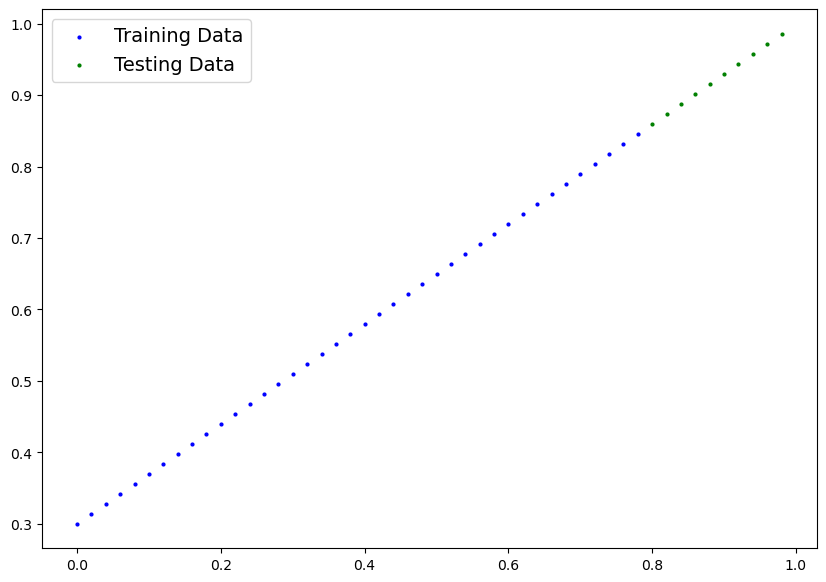

In [4]:
#Visualize the data

def plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=None):
    '''
    Plots training data, test data, and compares predictions
    '''
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels,c="b" ,s=4, label = "Training Data")
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing Data")

    #Now, plot the predictions
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    #shows the plot legend
    plt.legend(prop={"size":14})



plot_predictions()


In [5]:
#Building the model
#create a LinearRegressionModel class

class LinearRegressionModel(nn.Module): #this inherits from nn.Module, u can define layers in __init__() and forward logic in forward
    def __init__(self): #here you are defining the init method called implicitly when instantiating
        super().__init__() # it first calls the super init, which creates all of its instance variables
        self.weights = nn.Parameter(torch.randn(size=(1),dtype=torch.float), requires_grad=True) 
        #NOTE, when you do self.weights it creates or overides the weights attribute for that instance
        # torch.randn creates a random tensor of size 1 filled with number drawn from standard gaussian distribution (0 to 1)
        self.bias = nn.Parameter(torch.randn(size=(1), dtype=torch.float), requires_grad=True)
    def forward(self, x: torch.Tensor) -> torch.Tensor: #x is the imput data
        return torch.matmul(x,self.weights.T) + self.bias #this is the linear regression formula
        #WHAT DOES THIS DO, the x: torch.Tensor means that x is expecting a type torch.Tensor (not enforced)
        # and -> torch.Tensor means it is returning a torch.Tensor object, but again it is not enforced
        #because python is dynamically typed, this is as good as it gets



#NOW, THE EXPLANATION
# pytorch has 4 modules used to many any time of nn: torch.nn, torch.optim, torch.utils.data.Dataset, and
# torch.utils.data.DataLoader

#torch.nn contains all the building blocks for computational graphs, aka a series of ordered computations
# torch.nn.Parameter is a class that stores tensors that can be used by torch.nn. if requires_grad is true, it will calculate
#  gradients automatically via autograd

#torch.nn.Module is the base class for all neural network modes. all the building blocks for a neural network are subclasses
# if you are making a neural network, you must subclass nn.Module and impliment forward
'''
What does torch.nn.Module do?
1: keeps track of all learnable parameters (nn.Parameters)
2: keeps track fo all submodules
3: has .train() and .eval() to toggle behavior (toggle, batch mode)
4: .parameters() and .named_parameters to iterate the parameters (calling Module.parameters() will return a generator (like an iterator, but that generated required values as they come up) which will return tensor objects of all the parameters)
5: .children() and .modules() to iterate submodules (these are iterators for the ReLU or Linear in each, with chidren being immediate, and modules being recursive for all)
6: .forward to define computation

what atributes does it have:
1: _parameters, which is an internal ordered dictionary of all registered parameters with keys being the attribute names (private is just _param, a naming convention)
2: _modules which is a dictionary of all submodules (self.conv = nnCond2d()..) where conv is a submodule in the model
3: _buffers for persistent buffers
4: _bakcward_hooks, and _forward_hooks 
5: training boolean flag to indicate training/ eval mode



WHAT ABOUT nn.Parameter
nn.Parameter is a special type of tensor that tells pytorch that it is a learnable parameter
so when you assign a parameter to an attribute of a nn.Module, it:
1:automatically registers it as a parameter
2: includes it in the .parameters() for optimization
3: tracks it in the model's state_dict (used for displaying info)

NOTE: it doesn't have its own datastructure, it just wraps a tensor with required_grad=True by default
Use when you want the attribute to show up in model.parameters() and be optimized

'''






#torch.optim is used for optimization algorithms, which are ways that the parameters stored in torch.nn.Parameter can best
# change to improve the loss

#def forward() is needed since it defines what computation will occur on the data passed to a particular module
#MUST BE OVERRIDED FOR ANY SUBCLASS OF torch.nn.Module


# to put it simply, torch.nn contains all the stuff to do with neural networks. torch.nn.Module contains the larger building
#blocks like layers, torch.nn.Parameters contain the smaller ones like weights and bias(inside of a nn.Module)
#forward tells the larger blocks how to make calculations on imputs within the nn.Module
#torch.optim contains optimization algorithms on how to improve parameters in nn.Parameters to better represent imput data

"\nWhat does torch.nn.Module do?\n1: keeps track of all learnable parameters (nn.Parameters)\n2: keeps track fo all submodules\n3: has .train() and .eval() to toggle behavior (toggle, batch mode)\n4: .parameters() and .named_parameters to iterate the parameters\n5: .children() and .modules() to iterate submodules\n6: .forward to define computation\n\nwhat atributes does it have:\n1: _parameters, which is a dictionary of all registered parameters with keys being the attribute names\n2: _modules which is a dictionary of all submodules (self.conv = nnCond2d()..) where conv is a submodule in the model\n3: _buffers for persistent buffers\n4: _bakcward_hooks, and _forward_hooks \n5: training boolean flag to indicate training/ eval mode\n\n\n\nWHAT ABOUT nn.Parameter\nnn.Parameter is a special type of tensor that tells pytorch that it is a learnable parameter\nso when you assign a parameter to an attribute of a nn.Module, it:\n1:automatically registers it as a parameter\n2: includes it in the

In [38]:
#redo of creating a linear model
#now, with the diplaying of its state_dict and parameters

import torch
from torch import nn

class LinearRegressionModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(size=(1,),dtype=torch.float),requires_grad=True)
        #remember to make it (1,) so it is clearly a tuple
        self.bias = nn.Parameter(torch.randn(size=(1,), dtype=torch.float), requires_grad=True)
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return x*self.weights.T + self.bias #be sure to use the self. specifier

#sets the random seed to 42 for consistancy
torch.manual_seed(seed=42)
# creates an instance of the model, a subclass of torch.nn.Module
model = LinearRegressionModel2()
# displays the model parameters
print(list(model.parameters())) #turns the model parameters into a list

print(model.state_dict())



[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict({'weights': tensor([0.3367]), 'bias': tensor([0.1288])})


In [39]:
#now, use torch.inference_mode() to turn the model on inference mode
with torch.inference_mode():
    Y_preds = model(X_test)

print(f"Testing Data: {X_test,X_test.shape}")
print(f"Expected labels: {Y_test, Y_test.shape}")
print(f"Predictions: {Y_preds, Y_preds.shape}")

#this code runs a forward pass of your model on X_test, but does so with the special context of 
#torch.inference_mode(), which is a context manager (used with "with")
#that disables autograd (no gradients are tracked,), disables tensor versioning (used for backward passes)
# and view tracking (used to detect in-place opts )

# a context managers has an __enter__ and __exit__ method called when you start and finish running the code
#in a context manager, which will hopefully change the conditions and bring them back at the end

#thus, the X_test tensor was passed to your forward function, and the resulting tensor was returned


Testing Data: (tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
        0.9800]), torch.Size([10]))
Expected labels: (tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
        0.9860]), torch.Size([10]))
Predictions: (tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588]), torch.Size([10]))


tensor([0.4618, 0.4691, 0.4764, 0.4836, 0.4909, 0.4982, 0.5054, 0.5127, 0.5200,
        0.5272])

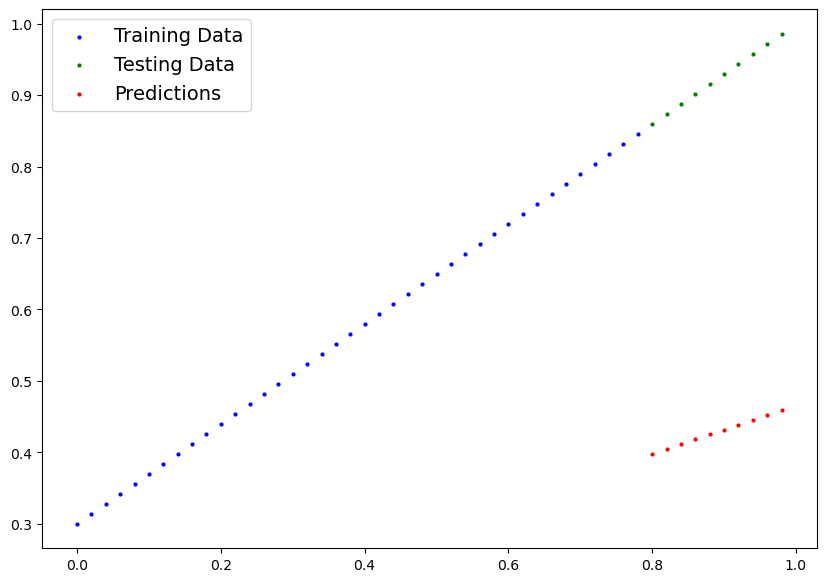

In [40]:
#use the plot_predictions() function to see our predictions:
plot_predictions(predictions=Y_preds.detach()) #either specify like this or use the correct order
#NOTE: .detach() detaches the tensor from the computational graph, whcih you must to do operate on it like turn it to numpy
#which is needed in plotting
Y_test - Y_preds

In [ ]:
#Now, time to train the model:

#currently, the model is using random parameters (weights and bias tensors) to predict the dot locations
# thus, we need to update the parameters of the model so that the predicted labels map more accuratly to the test labels

#TIME TO CREATE A LOSS FUNCTION AND AN OPTIMIZER:

#loss function:
#models how wrong your predictions (Y_preds) are relative to the truth labels  (Y_test). Lower is better
#found in the torch.nn class, where there are many different types of loss functions
#common types: MAE(Mean Absolute Error) for regression problems: torch.nn.L1Loss()
# or Binary Cross Entropy for binary classification problems: torch.nn.BCELoss()

#optimizer: tells your model how to best update its internal parameters to lower the loss function
# found in torch.optim.
# Stochastic Gradient Descent: torch.optim.SGD(), or Adam Optimizer torch.optim.Adam()


#since we are predicting a number lets use Mean Absolute Error
#HOW IT WORKS: it measures the absolute distance between two points (true labels and predictions) and then takes the mean across
#all examples

#we will also use SGD, or stochastic gradient Descent
#where torch.optim.SDG(params,lr)
#where params is the parameters you would like to optimize and lr is the learning rate, 
#learning rate = the rate at which the optimizer will try to update the parameters of the model to lower the loss function
# called HYPERPARAMETER bc set by ML engineer. usual values are 0.01, 0.001, or 0.0001, can also have it change dynamically, called
# learning rate scheduling


#HOW DOES Stochastic Gradient Descent work:
# the loss function L(theta) where theta are the parameters: weights and bias
# taking the gradient of the function grad(l(theta)) returns the point of steepest ascent of the loss
#to minimize the loss function, go the opposite way, so this function just makes an equation which is that
# theta new = theta old - lr * grad(Loss(theta, at a point xi, yi))

loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)



In [ ]:
# now that we have an optimizer and a loss function, we can create a training and testing loop!

#training loop means the model goes through training data and learns relationships between FEATURES and LABELS
#testing loop involves seeing how good the patterns that the model learned on the training data actually are
#each of these is called a loop siince the model must loop through the data 

#training loop example:

#1: model goes through all of the training data once, performing its forward function (model(x_train))
#2: calculate the loss: loss = loss_fn(Y_preds, Y_train)
#3: zerograd, or the optimizers gradients are set to 0 (the are accumulated by default) so they can be re-calculated
#4: preforms back-propagation, or finds the loss function gradient with respect to every model parameter (requires_grad = True)
# code example is loss.backwards()
#5: update the parameters using the optimizer according to the loss function optimizer.step()

#test loop example

#1: forward pass, (this creates the computational graph)
#2: model predictions compared to ground truth
#3: calculate evaluation metrics


'''
HOW DOES PYTORCH DO THIS???
when you computed y_preds = model(X_train) and then loss = loss_fn(y_preds, y_test) 
pytorch automatically build a computation graph that tracks all the tensors that require gradients, and all the operations
required on those tensors.

In the graph, every node is an operation and every edge is a tensor operated on, as well as how loss depends on the model parameters
thus, calling loss.backwards() backpropagages through the graph and calculates the gradient using chain rule (andrej karpathy)
Then, it stores all the gradients of leaf tensors (like weights and biases) in param.grad

'''

#NOW LETS IMPLIMENT:

torch.manual_seed(42)

epochs = 200 # the number of times the model will pass over the training data
train_loss_values=[] #tracks the values of the training and test loss for every epoch (will graph epoch count vs train/test)
test_loss_values=[]
epoch_count=[]

for epoch in range(epochs):

    #training
    model.train() #sets teh model in training mode

    #1: run a forwards pass on the data to obtain predictions
    Y_preds = model(X_train) #forward pass on the data in X_train
    #print(Y_preds)

    #2: calculate a loss function
    loss = loss_fn(Y_preds,Y_train)

    #3: zero the gradients to make room for a new backprop
    optimizer.zero_grad()

    #4: now, we backpropagate through the data using the computational graph to calculate each weight's gradient relative to the loss
    loss.backward()

    #5: now, we step the optimizer to modify our parameters in accordarce with the loss
    optimizer.step()

    #NOW FOR THE TESTING!!!

    #1: set the model in testing mode
    model.eval()

    #2: now, do a forward pass on the data

    with torch.inference_mode():
        #forward pass on test data
        test_preds = model(X_test)

        #calculates the loss function for the test
        test_loss = loss_fn(test_preds,Y_test)

        #print out what is happening, 
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss : {loss} | MAE Test Loss : {test_loss}")







In [ ]:
#plot the loss curves=
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Testing Loss function vs Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
#compare the learned values with the actual

print(f"The model learned the following for weights and bias")
print(model.state_dict())
print(f"\nAnd the origional values for weight and bias were {weight}, and {bias}")

In [ ]:
#Lastly, time to make inferences with a trained model

model.eval() #sets it into testing, or evaluation mode

#NOTE: we have not set up device agnostic code yet, so make sure both the model and the data are on the same device
# using model.to(device) and X_test.to(device)

with torch.inference_mode():
    final_predicts = model(X_test)
final_predicts
#final_loss = loss_fn(final_predicts, Y_test)
#final_loss

#lastly, lets plot the final predictions using the plot_predictions function we made earlier:

plot_predictions(predictions=final_predicts)

In [ ]:
#Now, time to save the model:

# torch.save saves a serialized object to disk using pythons pickle utility. Models, tensors, and other python objects can be saved
#using torch.save

#torch.load uses python's unpickling feature to deserialize and load pickled python object files into  memory. Can also set which
#device to load onto

#torch.nn.Module.load_state_dict(), loads a model parameter dictionary model.state_dict using a saved state_dict object

#generally, you want to save and load a model's state dict
#PROCESS:

#1: create a directory for saving models using pathlib
#2: create a file path to save the model
#3: call torch.save(obj,f) where obj is the object to save (state_dict) and f is the finelname of where to save it

from pathlib import Path

#creates model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# crate model save path
MODEL_NAME = "01_pytorch_workflow_model_1"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#SAVE THE MODEL STATE
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

#Check the saved file path
!ls -l models/01_pytorch_workflow_model_1



In [ ]:
#Loading a saved Pytorch Models state_dict
#now, we can load it using torch.nn.Module.load_state_dict(torch.load(f))

#WHY: since we only saved the state_dict, we have to pass the state_dict to a new instance of our model

#Instatiate a new instance of our model (will be instantiated with random weights)
model_02 = LinearRegressionModel2()

#Now load the state_dict of our saved model into the new instance of the model
model_02.load_state_dict(torch.load(f=MODEL_SAVE_PATH,weights_only=True)) #weights only means it wont open everythng, which is 
#more safe

#Now, we can test by running inference again on our model

model_02.eval()
with torch.inference_mode():
    model_02_preds = model_02(X_test)
Y_preds == model_02_preds